# Welcome to Recitation 10!


#**Go Read `Rec10-Intro.pdf` if you have not already.** 

This lab will not make sense without it! 

## RECITATION ASSIGNMENT

This lab project will guide you through the analysis.

## Data

To obtain data on how various variable values affect pouring and cooling, a batch
of 100 castings is poured with random variations in the mold variables about their baseline
values. The data are available in the file `castdata.csv` on github. Each row contains parameter
values (the inputs), and the cast batch time. The first line in the file contains the header
with the names of the variables. The data start in the second row. The first row of data has
the baseline values, that is, the values of the variables used in the current casting approach.

## Variables

The following variables can be varied: `Riser Height`, `Riser Diameter`, `Riser 1 Position`, `Riser 2 Position`, `Gate Diameter`, `Cup Height`, `Sprue Height`, `Sprue Diameter Bottom`, and `Sprue Diameter Top` (see Figure 2). The response variable is “`BatchTime`”.

## Importing Data

We first need to import the libraries necessary for this recitation. Next, we have to upload our data into the notebook; Upload the data set `castdata.csv` from the course github. We will call the entire data set `df`.

In [2]:
#math and arrays
import numpy as np
#dataframes
import pandas as pd
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
#linear regression and model selection 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
# 'df' is common pandas dataframe nomenclature
df = pd.read_csv('castdata.csv')
df.head()

,GateDiam,CupHeight,SprueHeight,RiserDiam,SprueDiamBot,SprueDiamTop,RiserHeight,Riser1Pos,Riser2Pos,BatchTime,Feasible
0,0.500000,5.000000,10.000000,7.000000,0.500000,0.750000,5.000000,3.500000,5.000000,3031.292318,1
1,0.318317,5.604768,10.148839,6.745247,0.635632,0.889822,5.318354,3.168774,5.233322,3042.417820,0
2,0.353834,5.846289,9.528183,7.345273,0.642489,1.005683,4.836570,3.265961,5.482437,3050.300487,1
3,0.596163,4.280124,10.887751,6.952856,0.317180,0.589558,5.492964,4.029533,4.719791,3034.202547,1
4,0.484338,5.205026,11.003688,7.254450,0.531424,0.595769,4.897376,4.011947,4.822747,3033.046509,1


## Visual Analysis

To examine the relationships between all pairs of variables ("`feasible`" is ignored through the use of `df.loc`, which splices the dataframe in the same way that one would a regular Python list), plot the dataframe with the pairplot command using the seaborn library:

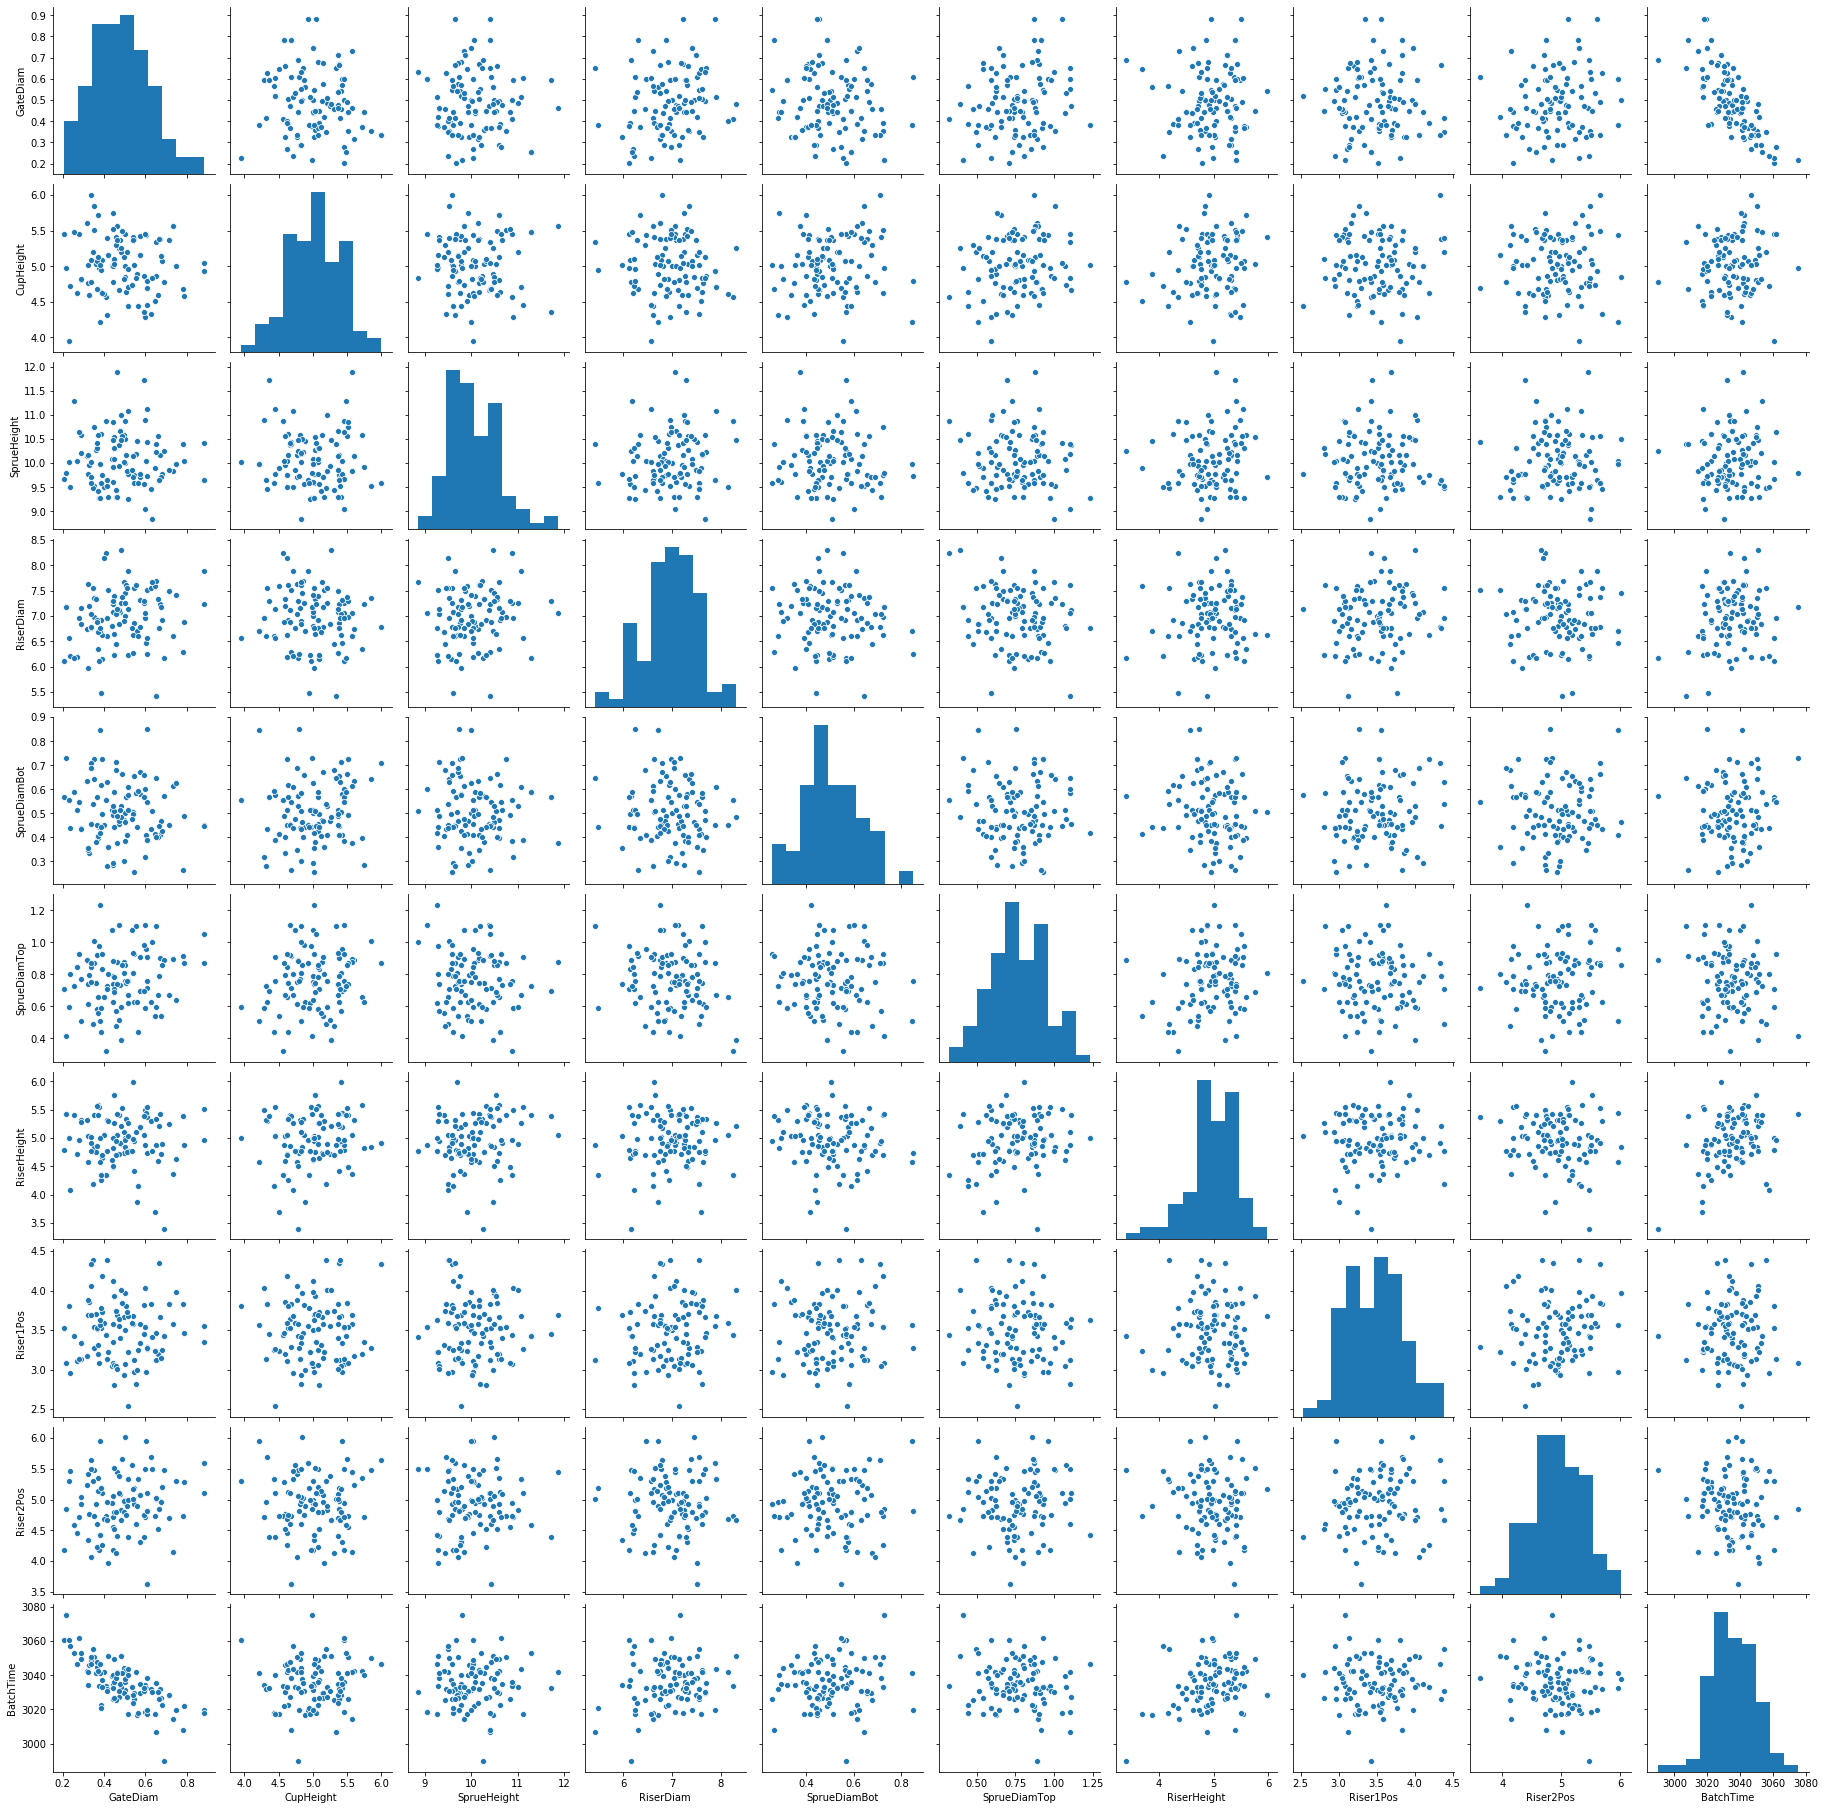

In [6]:
sns.pairplot(df.loc[:, :'BatchTime'])

When you pairplot a dataframe you get a scatterplot matrix. This matrix allows you to visualize all pairwise relationships between variables.

## Question 1

Based on the scatterplot matrix, which variable of the first 9 in df most affects "`BatchTime`"?

Ans: GateDiam seems to affect BatchTime the most.

## Multiple Linear Regression

We will now fit a multiple linear regression model for batch time using the mold variables as predictors. You'll see in the following code that we first import the statsmodels library. We then assign 'batchime' to be our dependent variable and 'X' to be our independent variables by splicing our dataframe as we did before. The line `X = sm.add_constant(X)` adds a column of all ones called `const` to X. This is needed to fit the intercept. 

Next, we create a regression model and get the results of the regression using model.fit(). Finally, we summarize these results. Run the code below to view the summary table.

In [7]:
batchtime = df["BatchTime"]
X = df.loc[:, :'Riser2Pos']
X = sm.add_constant(X) 

model = sm.OLS(batchtime, X)
results = model.fit()

# Print out the stats
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BatchTime   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     33.18
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           6.54e-25
Time:                        11:00:35   Log-Likelihood:                -326.08
No. Observations:                 100   AIC:                             672.2
Df Residuals:                      90   BIC:                             698.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2974.3611     20.133    147.736      0.000    2934.363    3014.359
GateDiam       -73.7652      4.919    -14.996      0.000     -83.538     -63.993
CupHeight        0.0650      1.766      0.037      0.971      -3.444       3.574
SprueHeight     -0.9823      1.236     -0.794      0.429      -3.439       1.474
RiserDiam        8.1317      1.304      6.238      0.000       5.542      10.722
SprueDiamBot     6.2152      5.638      1.102      0.273      -4.986      17.417
SprueDiamTop     0.5189      4.054      0.128      0.898      -7.536       8.574
RiserHeight      9.1809      1.617      5.679      0.000       5.969      12.392
Riser1Pos       -1.0727      1.816     -0.591      0.556      -4.681       2.536
Riser2Pos        0.8287      1.477      0.561      0.576      -2.105       3.763
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.531
Skew:                           0.035   Prob(JB):                        0.767
Kurtosis:                       2.650   Cond. No.                         469.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This summary output may seem intimidating at first; let's focus on the independent variables (section that vertically lists our variables with "coef", "std err", ...). Specifically, we are interested in the column titled $P>|t|$, which gives the p-value or statistical significance for that variable. Here's a way to interpret these values: a p-value of .01 would indicate statistical significance at the 99% level for that variable. In determining the degree of effect a variable has on `BatchTime`, simply observe how large the coefficent is; this means that a small change in that variable has a significant impact on our dependent variable, `BatchTime`.

## Question 2
Observe the summary output in the model for `BatchTime`. Which variables appear to be statistically significant at the 95% level, and how do they affect the `BatchTime`? Which predictor(s) have the largest effect on `BatchTime`?

Ans: GateDiam, RiserDiam, and RiserHeight are all statistically significant at the 95% level, with GateDiam having the largest effect on BatchTime by far. An increase in GateDiam  decreases BatchTime. Increases in RiserDiam and RiserHeight both increase Batch Time.

Now, for each of our variables, we would like to plot the fitted values from our regression versus those for the actual BatchTime using Matplotlib; run the code below and observe the graphs.

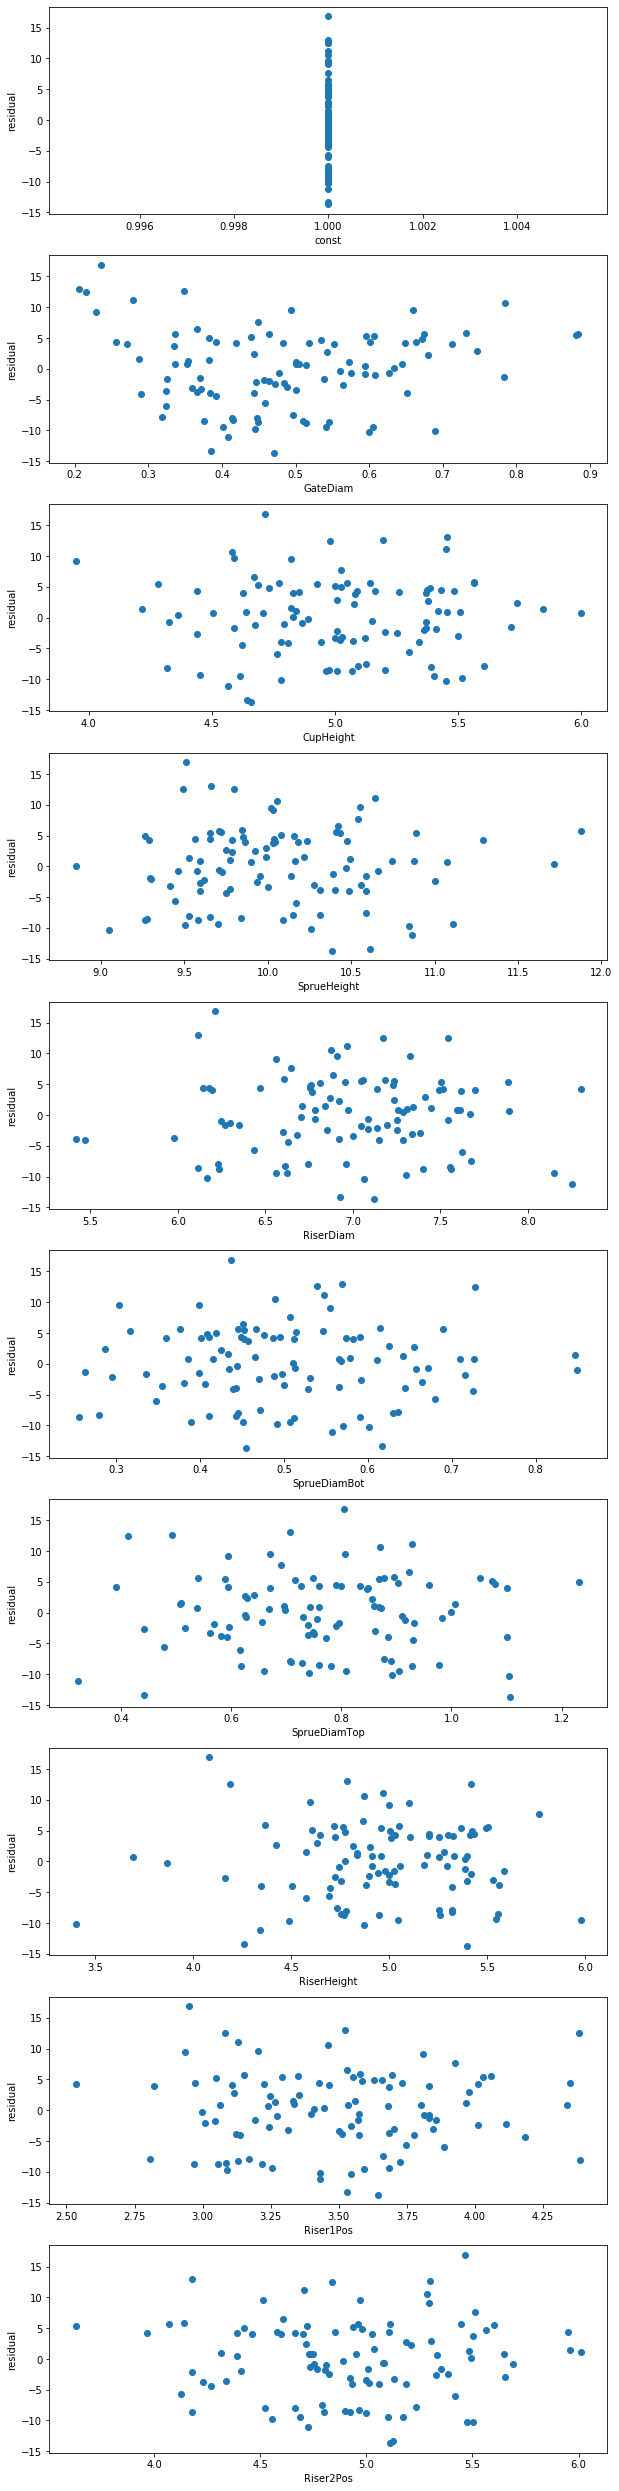

In [8]:
fig, ax = plt.subplots(10,figsize =(10,45))
resid = results.resid
for i in range(10): # for each of the nine variables
  # create a fitted plot for that variable ('i' indexes the variables)
  ax[i].scatter(X.iloc[:,i],resid) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("residual")

## Question 3

Examine the nine plots. Do any of them show nonlinear patterns? That is, does the difference between the fitted and actual values change based on the x value? Or does there appear to be a relatively uniform disparity across the plot? Describe the nonlinear patterns, if any, that you see.


Ans: None of the plots show strong nonlinear patterns, except for GateDiam, which has a very slight parabolic shape.

## Question 4


Are the other assumptions about the errors made by linear regression satisfied? In particular, address the following questions: Do the residuals appear mutually independent? Are there any problems with non-constant variance (heteroscedasticity)? Do the residuals appear normallly distributed?

Hint 1: You may want to refer to the `test-assumptions.ipynb` demo on github for ideas of visualizations that are helpful to answer these questions. 

Hint 2: Normally distributed residuals will form a line of a qq-plot, though not necessarily the 45-degree line. The slope is dependent on the variance of the residual. Try running the code below with various choices of `sigma` to convince yourself of this.  

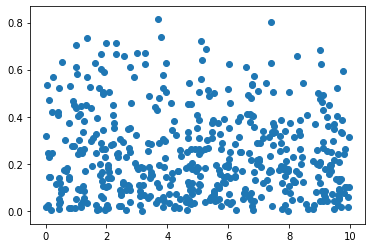

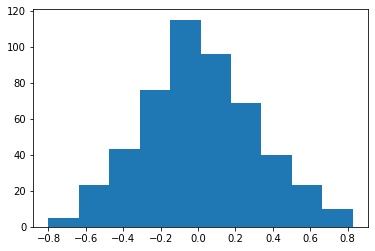

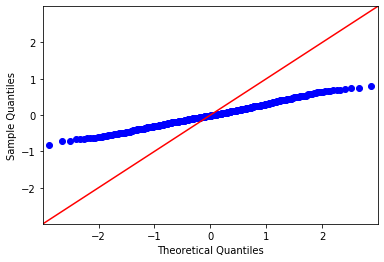

In [20]:
#Code for Hint 2

sigma = 0.3 #rerun this code with various choices of sigma, e.g. 0.5, 5

n=500
eps = sigma * np.random.randn(n) # normal residuals 
x = 10*np.random.rand(n)
y = x + eps
model = sm.OLS(y,x).fit()
plt.scatter(x, np.abs(model.resid))
plt.show()

# scipy.stats.probplot(data, dist="norm", plot=plt);
plt.hist(eps)
sm.qqplot(model.resid, line='45');


Ans: The residuals do seem normally distributed. The residual histogram looks visually normal, and the plot of x vs. absolute residual value doesn't widen/narrow over any particular value of x.

##Adding nonlinear terms

You may have noticed that `BatchTime` is nonlinearly related to `GameDiam`. Use the following commands to repeate the regression analysis with quadratic and cubic terms. 

In [21]:
X['GateDiamSquared'] = X['GateDiam']**2 #add quadratic term for GateDiam
X['GateDiamCubic'] = X['GateDiam']**3  #add cubic term
model2 = sm.OLS(batchtime, X)
results2 = model2.fit()

# Print out the stats
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BatchTime   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     40.52
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.01e-29
Time:                        11:19:04   Log-Likelihood:                -309.10
No. Observations:                 100   AIC:                             642.2
Df Residuals:                      88   BIC:                             673.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3028.3393     20.371    148.662      0.000    2987.857    3068.822
GateDiam         -476.1945     90.302     -5.273      0.000    -655.651    -296.738
CupHeight           1.1435      1.519      0.753      0.454      -1.876       4.162
SprueHeight        -0.8335      1.056     -0.790      0.432      -2.931       1.264
RiserDiam           9.5573      1.141      8.374      0.000       7.289      11.825
SprueDiamBot        4.5050      4.838      0.931      0.354      -5.110      14.120
SprueDiamTop        1.4360      3.480      0.413      0.681      -5.480       8.352
RiserHeight         9.1068      1.381      6.594      0.000       6.362      11.852
Riser1Pos          -0.7958      1.560     -0.510      0.611      -3.895       2.304
Riser2Pos           0.7674      1.263      0.608      0.545      -1.742       3.277
GateDiamSquared   694.4074    176.257      3.940      0.000     344.134    1044.681
GateDiamCubic    -367.9510    108.946     -3.377      0.001    -584.457    -151.445
==============================================================================
Omnibus:                        0.361   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.523
Skew:                          -0.102   Prob(JB):                        0.770
Kurtosis:                       2.710   Cond. No.                     6.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

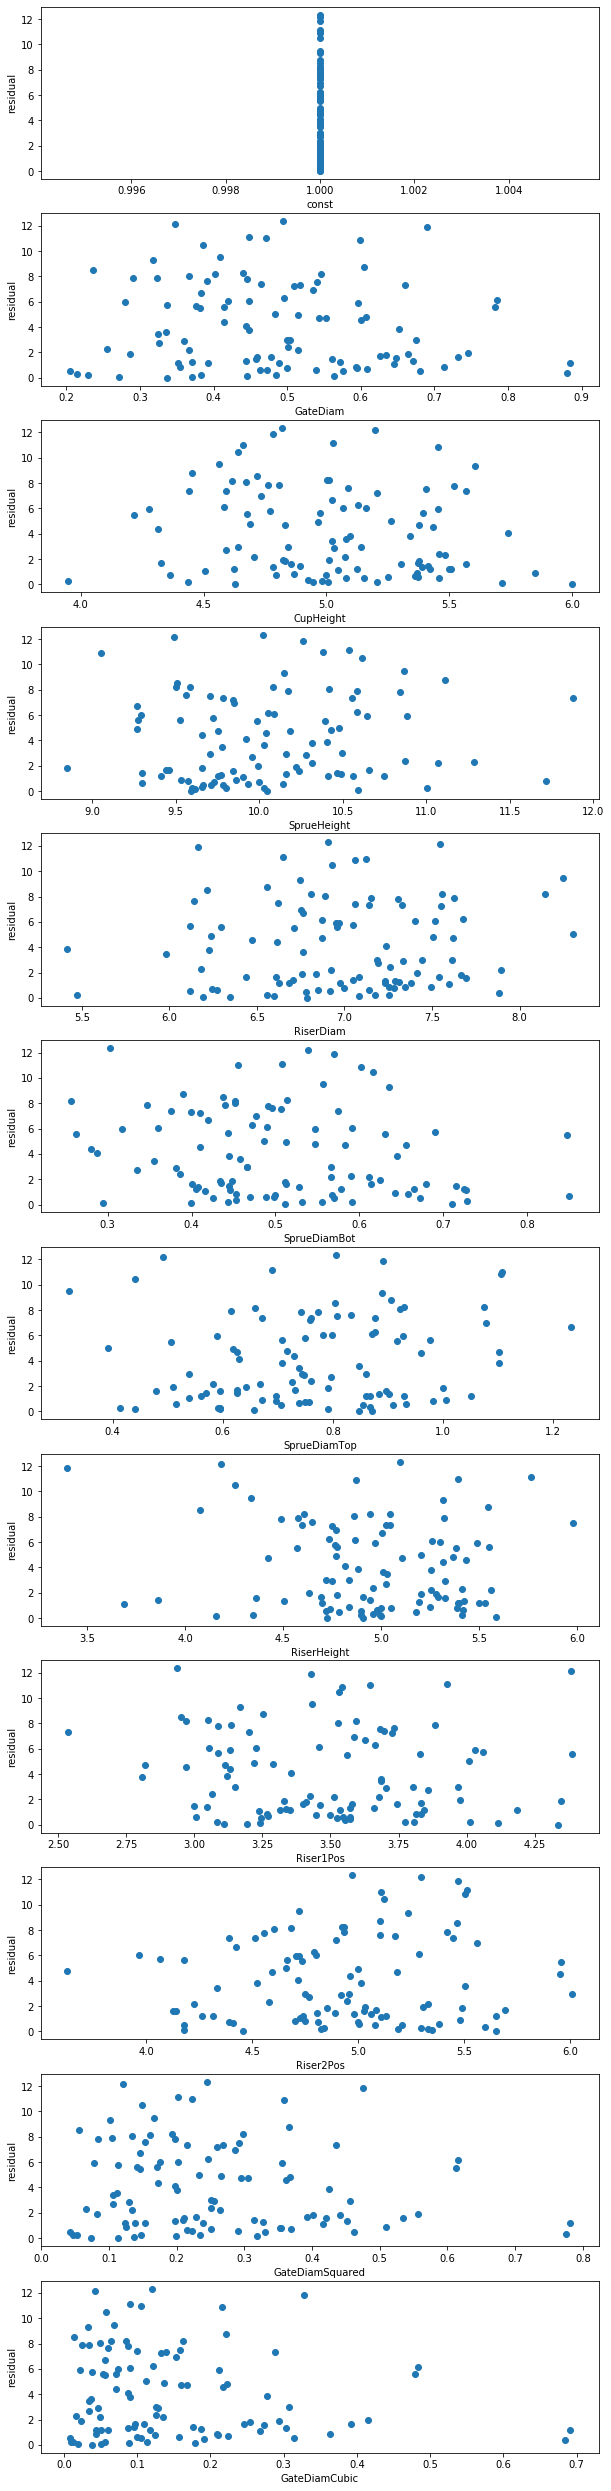

In [29]:
fig, ax = plt.subplots(12,figsize =(10,45))
absresid = np.abs(results2.resid)
for i in range(12): # for each of the nine variables
  # create a fitted plot for that variable ('i' indexes the variables)
  ax[i].scatter(X.iloc[:,i],absresid) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("residual")

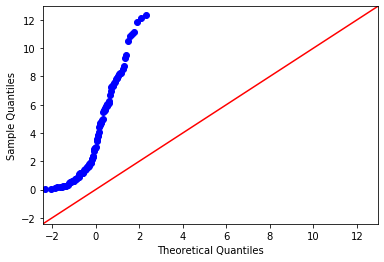

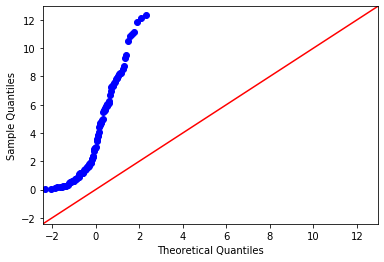

In [31]:
sm.qqplot(absresid, line='45')

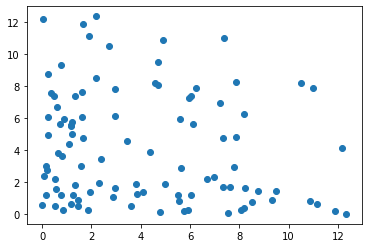

In [36]:
plt.scatter(absresid[:-1], absresid[1:])
plt.show()

##Question 5

Now based on the new model we have just fit, are the assumptions about the errors made satisfied? In particular, address the following questions: Do the residuals reveal any problems with the model? Are there any problems with non-constant variance (heteroscedasticity)? Do the residuals appear normall distributed?



Ans: The residuals do reveal problems with the model. The QQ plot shows a convex shape, indicating that the errors are not normally distributed, but rather have a skew. Furthermore, the plot of the absolute residuals for quadratic and cubed functions seem to narrow as x increases, indicating issues with non-constant variance.

##Model Selection

Now we want see if there is a good model that is simplier, i.e. it uses fewer features. 

First we must split our data into training and testing sets so that we can test our models accurately. 

Run the following code to split your data. 


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, batchtime, test_size=0.25, random_state=0)

##Model Selection Using AIC

Run the following code to select your model based on the training set using AIC, then test it using the testing set.

In [39]:
def minAIC(X,y):
    variables = X.columns
    model = sm.OLS(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        new_variables = variables[model.pvalues < maxp]
        newmodel = sm.OLS(y,X[new_variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = new_variables
        else:
            break
    return model,variables

# select on training set 
model,variables = minAIC(X_train, y_train)
print(variables)


y_pred = model.predict(X_test[variables])
print(mean_squared_error(y_test,y_pred))

Index(['const', 'GateDiam', 'SprueHeight', 'RiserDiam', 'RiserHeight',
       'GateDiamSquared', 'GateDiamCubic'],
      dtype='object')
32.83260941650999


##Question 6 

Which features does AIC select? What is the mean squared error for the testing set?

Ans: The AIC selects the constant, GateDiam, SprueHeight, RiserDiam, RiserHeight, GateDiamSquared and GateDiamCubic. The mean squared error is 32.83.

##Question 7

Now train a model on the training set that uses all the features. 

In [67]:
model2 = sm.OLS(y_train, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BatchTime   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     32.05
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.17e-21
Time:                        13:17:16   Log-Likelihood:                -230.65
No. Observations:                  75   AIC:                             485.3
Df Residuals:                      63   BIC:                             513.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3038.5242     24.356    124.753      0.000    2989.852    3087.197
GateDiam         -457.4017     98.009     -4.667      0.000    -653.258    -261.546
CupHeight           1.0887      1.836      0.593      0.555      -2.580       4.757
SprueHeight        -1.5336      1.218     -1.259      0.213      -3.968       0.901
RiserDiam          10.0509      1.428      7.039      0.000       7.197      12.904
SprueDiamBot        3.9140      5.813      0.673      0.503      -7.701      15.530
SprueDiamTop        3.1504      4.282      0.736      0.465      -5.405      11.706
RiserHeight         8.7544      1.623      5.393      0.000       5.510      11.998
Riser1Pos          -2.0609      2.012     -1.024      0.310      -6.081       1.959
Riser2Pos          -0.0686      1.440     -0.048      0.962      -2.946       2.809
GateDiamSquared   653.9316    192.507      3.397      0.001     269.237    1038.626
GateDiamCubic    -341.8309    119.097     -2.870      0.006    -579.827    -103.835
==============================================================================
Omnibus:                        1.375   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.370
Skew:                          -0.235   Prob(JB):                        0.504
Kurtosis:                       2.533   Cond. No.                     5.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Question 8

What is the mean squared error for your new model? Which model do you prefer and why?

In [69]:
y_pred2 = model2.predict(X_test)
mean_squared_error(y_test,y_pred2)

34.42903719852108

Ans: Mean squared error is now 34.42, which is larger than before. This indicates that the new model predicts the value for BatchTime slightly worse than the previous model